## Ridge Regression


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [57]:
data = { 'Marketing Spend (Million $)' : [23, 26, 30, 34, 43, 48],
         'Sales (Million $)' : [651, 762, 856, 1063, 1190, 1298]
       }

In [58]:
data = pd.DataFrame(data)

In [59]:
data

,Marketing Spend (Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


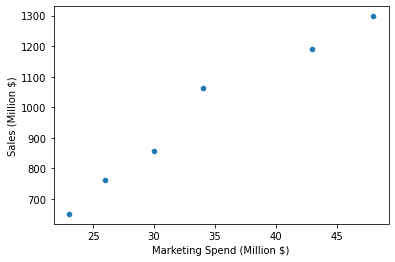

In [60]:
sns.scatterplot(data = data, x = 'Marketing Spend (Million $)', y = 'Sales (Million $)')
plt.show()

In [61]:
scaler = MinMaxScaler()

In [62]:
data[['Marketing Spend (Million $)', 'Sales (Million $)']] = \
    scaler.fit_transform(data[['Marketing Spend (Million $)', 'Sales (Million $)']])

In [63]:
data

,Marketing Spend (Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


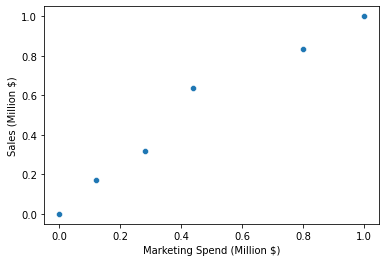

In [64]:
sns.scatterplot(data = data, x = 'Marketing Spend (Million $)', y = 'Sales (Million $)')
plt.show()

In [65]:
X = data['Marketing Spend (Million $)'].values.reshape(-1, 1)
y = data['Sales (Million $)']
y

0    0.000000
1    0.171561
2    0.316847
3    0.636785
4    0.833076
5    1.000000
Name: Sales (Million $), dtype: float64

In [66]:
reg = LinearRegression()

In [67]:
reg.fit(X, y)

LinearRegression()

In [68]:
y_pred = reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [69]:
r2_score(y, y_pred)

0.9652190930694494

In [70]:
# Residual sum of squares = Mean Squared error * Total number of datapoints

rss = np.sum(np.square(y - y_pred))
print ('rss:  ', rss)

mse = mean_squared_error(y, y_pred)
print ('mse:  ', mse)

# Root mean square error
rmse = mse ** 0.5
print ('rmse: ', rmse)

rss:   0.026808307381756883
mse:   0.004468051230292814
rmse:  0.06684348308019873


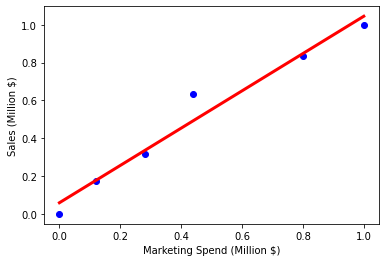

In [71]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red', linewidth = 3 )
plt.xlabel('Marketing Spend (Million $)')
plt.ylabel('Sales (Million $)')
plt.show()

# Polynomial Regression

In [72]:
X = data['Marketing Spend (Million $)'].values.reshape(-1, 1)

In [73]:
X

array([[0.  ],
       [0.12],
       [0.28],
       [0.44],
       [0.8 ],
       [1.  ]])

In [74]:
poly = PolynomialFeatures(3)

In [75]:
Y = poly.fit_transform(X)

In [76]:
print (Y)

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]


In [77]:
degree = 5

polyreg5 = PolynomialFeatures(degree)
X_polyreg5 = polyreg5.fit_transform(X)

In [78]:
linreg5 = LinearRegression()
linreg5.fit(X_polyreg5, y)

LinearRegression()

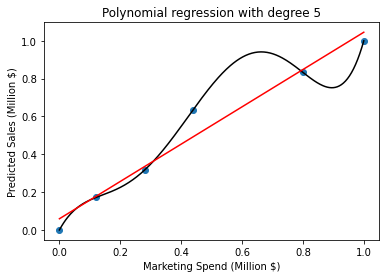

In [79]:
x_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

plt.figure()
plt.scatter(X, y)
plt.plot(x_seq, linreg5.predict(polyreg5.fit_transform(x_seq)), color = 'black')
plt.plot(x_seq, reg.predict(x_seq), color = 'red')
plt.title("Polynomial regression with degree " + str(degree))
plt.xlabel('Marketing Spend (Million $)')
plt.ylabel('Predicted Sales (Million $)')
plt.show()

In [80]:
y_pred5 = linreg5.predict(polyreg5.transform(X))
print (r2_score(y, y_pred5))

1.0


In [81]:
rss = np.sum(np.square(y - y_pred5))
print ('rss:  ', rss)

mse = mean_squared_error(y, y_pred5)
print ('mse:  ', mse)

# Root mean square error
rmse = mse ** 0.5
print ('rmse: ', rmse)

rss:   1.6288128800067282e-28
mse:   2.714688133344547e-29
rmse:  5.2102669157582964e-15


# Ridge Regression

In [82]:
#Applying Ridge regression with varying the hyperparameter 'lambda'

X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

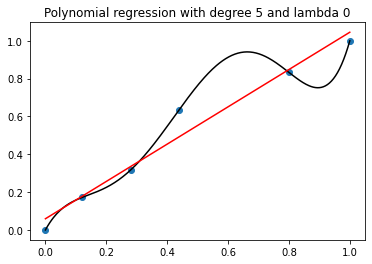

r2_score:   1.0
[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
  41.99939801]


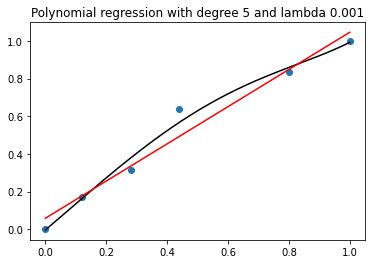

r2_score:   0.9877944050899672
[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]


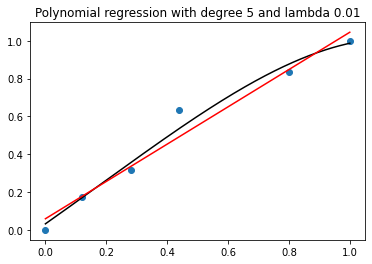

r2_score:   0.9809539612050426
[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]


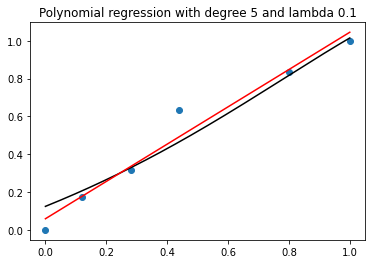

r2_score:   0.9396437428481395
[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]


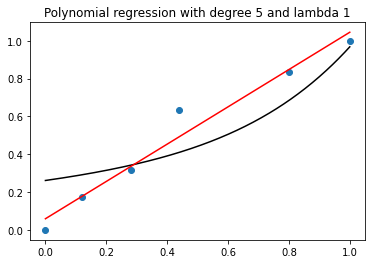

r2_score:   0.7953946450161844
[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]


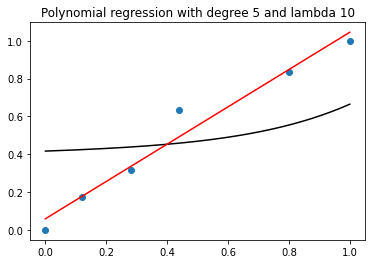

r2_score:   0.3849505189364377
[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]


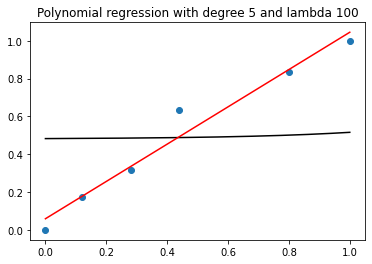

r2_score:   0.05859088028960113
[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]


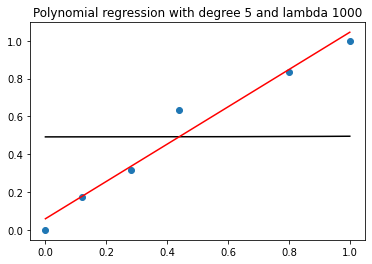

r2_score:   0.006166338591997
[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]


In [54]:
for i in lambdas:
    degree = 5
    
    #creating degree for 5 features
    ridgecoef = PolynomialFeatures(degree)
    
    #transform input features to polynomial features (1, x, x2, x3, x4, x5)
    X_poly = ridgecoef.fit_transform(X)
    
    ridgereg = Ridge(alpha = i)            # intialize ridge regression with alpha 
    ridgereg = ridgereg.fit(X_poly, y)     # fit the model on polynomial features
    
    # plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X, y)
    
    plt.plot(X_seq, ridgereg.predict(ridgecoef.fit_transform(X_seq)), color = 'black')
    plt.plot(X_seq, reg.predict(X_seq), color = 'red')
    plt.title("Polynomial regression with degree " + str(degree) + " and lambda " + str(i) )
    plt.show()
    
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print ("r2_score:  ", r2_score(y, y_pred))
    print (ridgereg.coef_)  #model coefficients    

# Lasso Regression

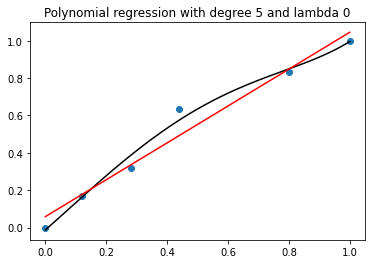

r2_score:   0.9882107530558196
[ 0.          1.46152502  0.16901155 -1.08666253 -0.14086504  0.60488725]


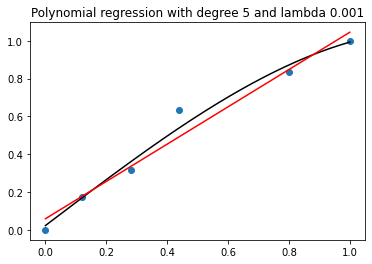

r2_score:   0.9826605659196856
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]


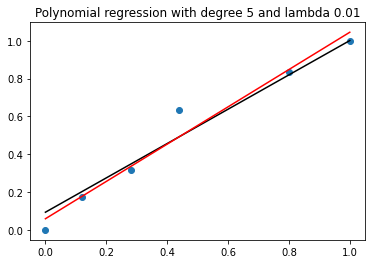

r2_score:   0.9591121182494984
[0.       0.907835 0.       0.       0.       0.      ]


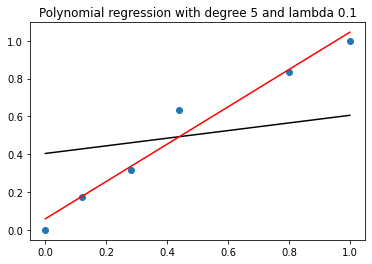

r2_score:   0.3545216110743441
[0.         0.20176806 0.         0.         0.         0.        ]


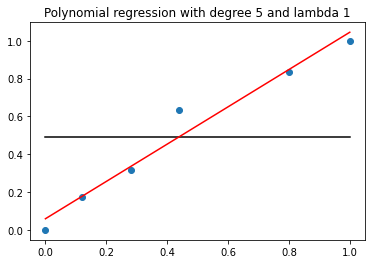

r2_score:   0.0
[0. 0. 0. 0. 0. 0.]


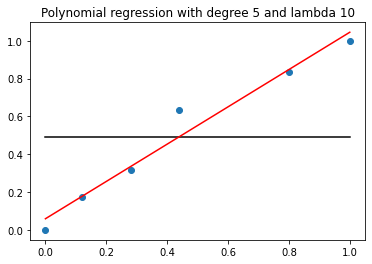

r2_score:   0.0
[0. 0. 0. 0. 0. 0.]


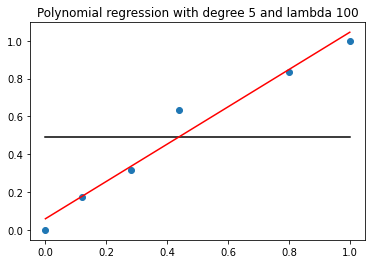

r2_score:   0.0
[0. 0. 0. 0. 0. 0.]


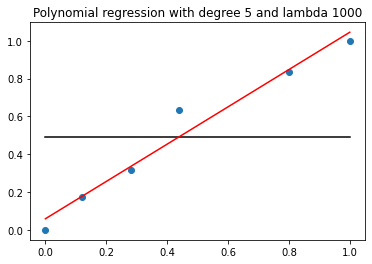

r2_score:   0.0
[0. 0. 0. 0. 0. 0.]


In [83]:
for i in lambdas:
    degree = 5
    
    #creating degree for 5 features
    lassocoef = PolynomialFeatures(degree)
    
    #transform input features to polynomial features (1, x, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    
    lassoreg = Lasso(alpha = i)            # intialize lasso regression with alpha 
    lassoreg = lassoreg.fit(X_poly, y)     # fit the model on polynomial features
    
    # plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X, y)
    
    plt.plot(X_seq, lassoreg.predict(lassocoef.fit_transform(X_seq)), color = 'black')
    plt.plot(X_seq, reg.predict(X_seq), color = 'red')
    plt.title("Polynomial regression with degree " + str(degree) + " and lambda " + str(i) )
    plt.show()
    
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print ("r2_score:  ", r2_score(y, y_pred))
    print (lassoreg.coef_)  #model coefficients 

## Ridge and Lasso Regression for Specific lambda value

In [87]:
degree = 5
    
#creating degree for 5 features
ridgecoef = PolynomialFeatures(degree, include_bias=True)

X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 0.001)
ridgereg.fit(X_poly, y)

print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("ridge r2 score: ", str(r2_score(y, y_pred)))


#creating degree for 5 features
lassocoef = PolynomialFeatures(degree)

X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly, y)

print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))
print("lasso r2 score: ", str(r2_score(y, y_pred)))

[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]
ridge r2 score:  0.9877944050899672
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]
lasso r2 score:  0.9826605659196856


In [90]:
betas = pd.DataFrame(index = ['1', 'x', 'x2', 'x3', 'x4', 'x5'], 
                     columns = ['Polynomial', 'Ridge', 'Lasso'])

betas['Polynomial'] = linreg5.coef_
betas['Ridge'] = ridgereg.coef_
betas['Lasso'] = lassoreg.coef_
betas

,Polynomial,Ridge,Lasso
1,0.000000,0.000000,0.000000
x,2.942952,1.387022,1.224146
x2,-19.853518,0.122928,-0.000000
x3,71.185433,-0.686494,-0.253970
x4,-95.274266,-0.380945,-0.000000
x5,41.999398,0.552412,-0.000000
